# TOV's equations for the Bag model

This notebook replicates the obtained results by José C. Jimenez and Eduardo S.Fraga in their paper titled "Radial oscillations of quark stars from perturbative QCD". For this notebook, we focused on the Bag model, a very elegant model, although naive but which serves us as a toy model. All nonperturbative physics is included in one universal quantity, the famous bag constant, $B=(145MeV)^4$. The first part of the code will solve the TOV's equation, and the second part we will implement a code to solve radial oscillations for the same equation of state.

In [ ]:
# Import libraries
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt



# Define the constants and parameters
# =============================================================================
G = 6.674e-11                         # Gravitational constant in m^3 kg^-1 s^-2
c = 2.9979e8                          # Speed of light in m/s
M_sun = 1.989e30                      # Mass of the Sun in kg
R_sun = 6.9634e8                      # Radius of the Sun in m
B = 56                                # Bag Model Parameter  in MeV fm^{-3}, for this case B = (145 MeV)^4
pi = np.pi
e0 = 1.602e32
c1 = c**2/(G*e0)**(0.5)
c2 = c**4/(G**3 * e0)**0.5



# Equation of state for a gas of unpaired quark star, MIT
# ==============================================================================
def EoS(e):
  return (e - 4.0*B)/3.0


# Equation of state for a gas of unpaired quark star in terms of pressure, MIT
# ==============================================================================
def EoS_rho(p):
  return (3.0*p + 4.0*B)


# First equation of stellar structure
# ==============================================================================
def dmdr(r, m, p, e):
    return 4.0 * pi * r**2 * e


# Second equation of stellar structure
# =================================================================
def dpdr(r, m, p, e):
  if r == 0:
     return 0
  else:
      return -(e*m/r**2)*(1+p/e)*(1+(4*pi*r**3*p)/m)/(1-2*m/r)

# Third equation of stellar structure
def dnudr(r, m, p, e):
  return -(2/(p+e))*dpdr(r,m,p,e)

In [ ]:
# Runge-Kutta method
# ==============================================================================
def RGK4(enec):
# Initial Conditions
# ========================================================
    enec = enec
    e = enec
    dr = 0.000001
    r = 0
    m = 1e-18
    # Define initial conditions
    P = EoS(enec)
    km = np.ones(4)
    kp = np.ones(4)
    pa = []
    ma = []
    ra = []
    da = []
    en = []
    while ( P >= 0):
        km[0] = dr*dmdr(r, m, P,e)
        kp[0] = dr*dpdr(r, m, P, e)

        e = EoS_rho(P+kp[0]/2)
        km[1] = dr*dmdr(r+dr/2, m+km[0]/2,P + kp[0]/2, e)
        kp[1] = dr*dpdr(r+dr/2, m+km[0]/2,P + kp[0]/2, e)


        e = EoS_rho(P+kp[1]/2)
        km[2] = dr*dmdr(r+dr/2, m + km[1]/2, P+ kp[1]/2, e)
        kp[2] = dr*dpdr(r+dr/2, m + km[1]/2, P + kp[1]/2, e)

        e = EoS_rho(P+kp[2]/2)
        km[3] = dr*dmdr(r+dr, m + km[2], P+ kp[2], e)
        kp[3] = dr*dpdr(r+dr, m + km[2], P+ kp[2], e)


        P += 1/6 * (kp[0] + 2*(kp[1]+kp[2]) + kp[3])
        m += 1/6 * (km[0] + 2*(km[1]+km[2]) + km[3])
        r += dr
        e = EoS_rho(P)

        pa.append(P)
        ma.append(m)
        ra.append(r)
        en.append(e)
    #print("Surface values")
    #print("Mass: %s Msun  Radius: %s km " % ( m/M_sun,r/1000))
    return [np.array(pa), np.array(ma), np.array(ra),np.array(en), m, r]


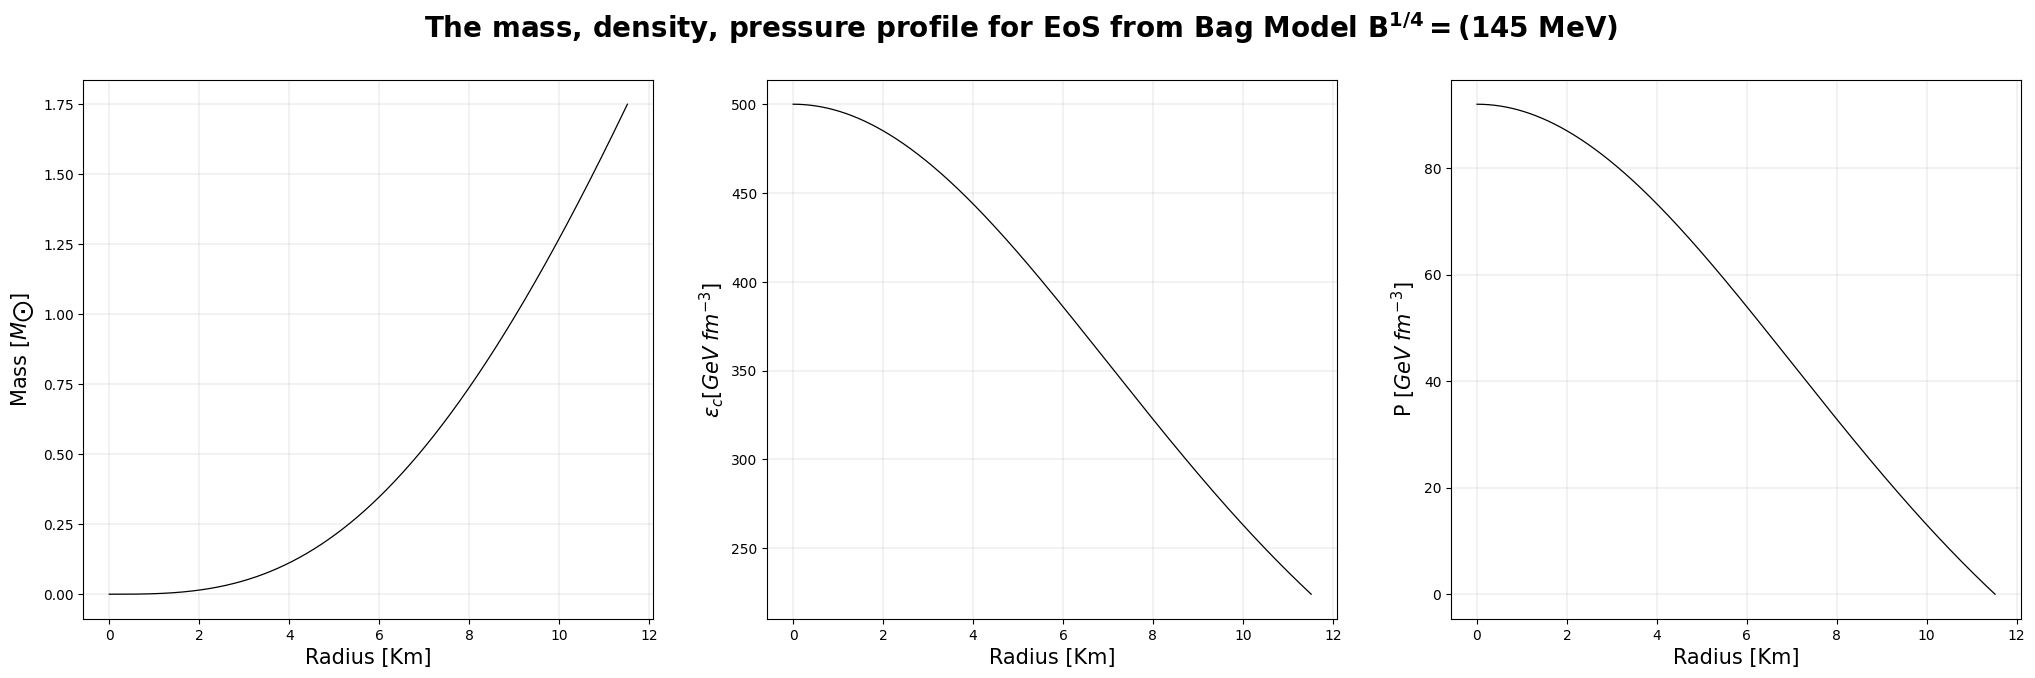

[ 9.19999989e+01  9.19999960e+01  9.19999912e+01 ...  7.84356710e-03
  9.70541513e-04 -5.90178985e-03]


In [ ]:

P, M, r, ene, mass ,rad  = RGK4(500)
M = M*c2/M_sun
rad = r*c1/1000


f,ax = plt.subplots(figsize=(25,7),ncols=3, nrows=1)

ax[0].plot(rad,M, color  = "black" , linewidth =.9)
ax[0].set_ylabel(r"Mass $[M_{\bigodot}]$" , size = 15)
ax[0].set_xlabel(r"Radius [Km]" , size = 15)
ax[0].grid(color='black', linestyle='--', linewidth=0.1)



ax[1].plot( rad , ene, 'k', linewidth = 0.9)
ax[1].set_ylabel(r"$\epsilon_{c} [GeV \; fm^{-3}]$", size = 15)
ax[1].set_xlabel(r'Radius [Km]', size = 15)
ax[1].grid(color='black', linestyle='--', linewidth=0.1)


ax[2].plot(rad,P,'k', linewidth = .9)

ax[2].set_ylabel(r'P $[GeV\;fm^{-3}]$', size = 15)
ax[2].set_xlabel(r"Radius [Km]", size = 15)
ax[2].grid(color='black', linestyle='--', linewidth=0.1)
plt.suptitle(r"The mass, density, pressure profile for EoS from Bag Model $\mathbf{B^{1/4}=(145}$ MeV)", size = 20, weight = "bold")
plt.show()
print(P)

In [ ]:
# Interval of central energy densities
# ==============================================================================
def interval(ef):
  e_c = np.arange(1.05, ef,1.1)
  Mass = []
  radiu =  []
  for i in e_c:
    P, M, r, d, mass , radii = RGK4(i)
    Mass.append(mass*c2/M_sun)
    radiu.append(radii*c1/1000)
  return Mass, radiu, e_c
Mass, radiu, e_c= interval(3000)

Energy density Max :1.0735500000000002 
Mass Max: 2.032410526256346
Radius Max: 11.092480336317537


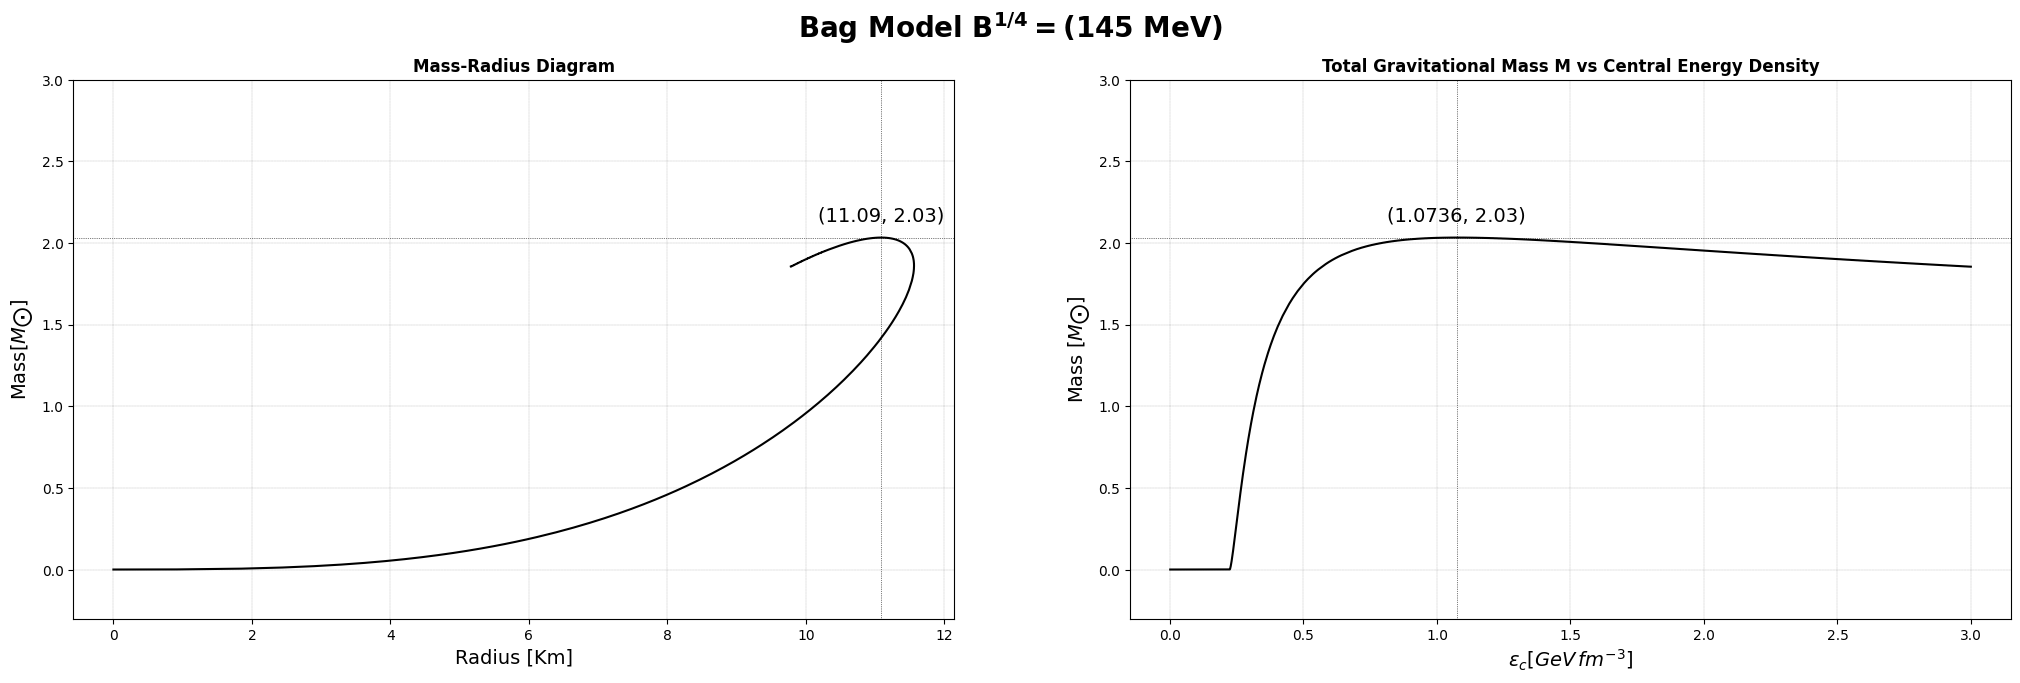

In [ ]:
# Diagram of Mass vs Radius
# ==============================================================================
fig, ax = plt.subplots(nrows = 1 , ncols = 2, figsize = (25,7))
ax[0].plot(radiu, Mass, "black")
ax[0].set_xlabel("Radius [Km]", size = 14)
ax[0].set_ylabel(r"Mass$[M_{\bigodot}]$", size = 14)
ax[0].set_title(r"Mass-Radius Diagram", weight = "bold")
ax[0].set_ylim(-0.3,3)
ax[0].grid(color='black', linestyle='--', linewidth=0.1)

# Plot of the diagram central energy - Mass
# ==============================================================================
e_cG = e_c/1000   # MeV to GeV
ax[1].plot(e_cG,Mass, "black")
ax[1].set_xlabel(r"$\epsilon_{c}[GeV\, fm^{-3}]$", size = 14)
ax[1].set_ylabel(r"Mass $[M_{\bigodot}]$", size = 14)
ax[1].set_title(r"Total Gravitational Mass M vs Central Energy Density", weight = "bold")
ax[1].grid(color='black', linestyle='--', linewidth=0.1)
ax[1].set_ylim(-0.3,3)
plt.suptitle(r'Bag Model $\mathbf{B^{1/4}=(145}$ MeV)', weight = "bold" , size = 20)

ind = Mass.index(max(Mass))
print(f'Energy density Max :{e_cG[ind]} ')
print(f'Mass Max: {max(Mass)}')
print(f'Radius Max: {radiu[ind]}')


# Annotation for the first diagram
# =============================================================================
y1 = round(max(Mass),2)
x1 = round(radiu[ind],2)
coord_a_señalar1 = (x1, y1)
ax[0].annotate(f'({coord_a_señalar1[0]}, {coord_a_señalar1[1]})', (coord_a_señalar1[0], coord_a_señalar1[1]), textcoords="offset points", xytext=(0,12), ha='center', size = 14, color = "black")
ax[0].axvline(x = x1, color = 'black', linestyle = "dotted" , linewidth = 0.5 )
ax[0].axhline(y = y1 , color = 'black', linestyle = "dotted" , linewidth=0.5)

# Annotation for the second diagram
# ==============================================================================
y2 = round(max(Mass),2)
x2 = round(e_cG[ind],4)
coord_a_señalar2 = (x2, y2)
ax[1].annotate(f'({coord_a_señalar2[0]}, {coord_a_señalar2[1]})', (coord_a_señalar2[0], coord_a_señalar2[1]), textcoords="offset points", xytext=(0,12), ha='center', size = 14, color = "black")
ax[1].axvline(x = x2, color = 'black', linestyle = "dotted" , linewidth = 0.5 )
ax[1].axhline(y = y2 , color = 'black', linestyle = "dotted" , linewidth=0.5)
plt.show()

# Radial Oscillations

In [ ]:
def Log(m,r):
  if m == 0 or r== 0:
      L = 0
  else:
      L = np.log(1-2.0 * m/r)
  return L

In [ ]:
def dnudr(r, m, p, e):
  return -(2/(p+e))*dpdr(r,m,p,e)

def NU(e0):
  P, m, r, ene,  M ,R  = RGK4(e0)
  nu = []
  dr = 0.000005
  v = Log(M,R)
  for i in range(len(P)):
    v = v - dnudr(r[-1-i],m[-1-i],P[-1-i],ene[-1-i])*dr
    nu.append(v)
  return list(reversed(nu))

nu = NU(1100)

In [ ]:

def LA(e0):
  L = []
  p, m, r, e,  M ,R  = RGK4(e0)
  for i in range(len(m)):
    if m[i] == 0 or r[i] == 0 :
      l = 0
    else:
      l = -np.log(1.0-2.0 * m[i]/r[i])
    L.append(l)
  return L

In [ ]:
def radial1(r,xi, DP, m, p, e, In, L, N , W):
   return -(1/r)*(3*xi+DP/In*p)-dpdr(r,m,p,e)*xi/(p+e)


def radial2(r,xi, DP, m, p, e, In, L, N, W):
  out1 = xi*(W**2.0*np.exp(L-N)*(p+e)*r-4.0*dpdr(r,m,p,e))
  out2 = -xi*(dpdr(r,m,p,e)**2*(r/(p+e))-8.0*pi*np.exp(L)*(p+e)*p*r)
  out3 =  DP*(dpdr(r,m,p,e)/(p+e)-4.0*pi*(p+e)*r*np.exp(L))
  return out1 + out2 + out3

In [ ]:
def RK4_RO(e0,W):
  p, m, r, e, mass ,rad  = RGK4(e0)
  N = NU(e0)
  L = LA(e0)
  # step
  dr = 0.00005
  # Analytic expression for the index
  In = (4/3)*(1+B/p)
  # Initial Conditions
  # At the center
  xi = 1
  DP = -3*xi*In[0]*p[0]

  xi_final = []
  DP_final = []
  for i in range(len(p)):
    k1 = dr*radial1(r[i] + dr/2.0,xi, DP, m[i], p[i], e[i], In[i], L[i], N[i], W)
    l1 = dr*radial2(r[i] + dr/2.0,xi, DP, m[i], p[i], e[i], In[i], L[i], N[i], W)

    k2 = dr*radial1(r[i] + dr/2.0, xi + k1/2.0, DP + l1/2.0, m[i  ], p[i], e[i], In[i], L[i], N[i], W)
    l2 = dr*radial2(r[i] + dr/2.0, xi + k1/2.0, DP + l1/2.0, m[i], p[i], e[i], In[i], L[i], N[i], W)

    k3 = dr*radial1(r[i] + dr/2.0, xi + k2/2.0, DP + l2/2.0, m[i], p[i], e[i], In[i], L[i], N[i], W)
    l3 = dr*radial2(r[i] + dr/2.0, xi + k2/2.0, DP + l2/2.0, m[i], p[i], e[i], In[i], L[i], N[i], W)

    k4 = dr*radial1(r[i] + dr/2.0, xi + k3, DP + l3, m[i], p[i], e[i], In[i], L[i], N[i], W)
    l4 = dr*radial2(r[i] + dr/2.0, xi + k3, DP + l3, m[i], p[i], e[i], In[i], L[i], N[i], W)

    xi += ( k1 + 2.0 * k2 +2.0 * k3 + k4) / 6.0
    DP += ( l1 + 2.0 * l2 +2.0 * l3 + l4) / 6.0

    xi_final.append(xi)
    DP_final.append(DP)
  return xi_final, DP_final



In [ ]:
for j in range(300,1200,10):
  omegas= []
  for i in range(1,100):
    w = i*2.0* pi
    xi_final, DP_final = RK4_RO(j,w)
    if DP_final[-1] == 0:
      omegas.append(w)
      print(DP_final[-1],w, j)
  print(omegas)

0.0 534.0707511102648 300
0.0 578.0530482605219 300
[534.0707511102648, 578.0530482605219]
0.0 446.10615680975064 310
0.0 452.3893421169302 310
0.0 464.9557127312894 310
0.0 490.0884539600077 310
0.0 508.93800988154646 310
0.0 521.5043804959057 310
0.0 527.7875658030853 310
0.0 565.4866776461628 310
0.0 596.9026041820607 310
[446.10615680975064, 452.3893421169302, 464.9557127312894, 490.0884539600077, 508.93800988154646, 521.5043804959057, 527.7875658030853, 565.4866776461628, 596.9026041820607]
0.0 370.7079331235956 320
0.0 376.99111843077515 320
0.0 395.84067435231395 320
0.0 420.97341558103227 320
0.0 433.53978619539146 320
0.0 446.10615680975064 320
0.0 464.9557127312894 320


<ipython-input-28-d2451918ea6a>:6: RuntimeWarning: overflow encountered in double_scalars
  out1 = xi*(W**2.0*np.exp(L-N)*(p+e)*r-4.0*dpdr(r,m,p,e))
<ipython-input-29-84e4a351c7ab>:20: RuntimeWarning: invalid value encountered in double_scalars
  k2 = dr*radial1(r[i] + dr/2.0, xi + k1/2.0, DP + l1/2.0, m[i  ], p[i], e[i], In[i], L[i], N[i], W)
<ipython-input-29-84e4a351c7ab>:21: RuntimeWarning: invalid value encountered in double_scalars
  l2 = dr*radial2(r[i] + dr/2.0, xi + k1/2.0, DP + l1/2.0, m[i], p[i], e[i], In[i], L[i], N[i], W)
<ipython-input-28-d2451918ea6a>:2: RuntimeWarning: invalid value encountered in double_scalars
  return -(1/r)*(3*xi+DP/In*p)-dpdr(r,m,p,e)*xi/(p+e)
<ipython-input-28-d2451918ea6a>:9: RuntimeWarning: invalid value encountered in double_scalars
  return out1 + out2 + out3
<ipython-input-29-84e4a351c7ab>:30: RuntimeWarning: invalid value encountered in double_scalars
  DP += ( l1 + 2.0 * l2 +2.0 * l3 + l4) / 6.0


[370.7079331235956, 376.99111843077515, 395.84067435231395, 420.97341558103227, 433.53978619539146, 446.10615680975064, 464.9557127312894]
0.0 307.8760800517997 330
0.0 314.1592653589793 330
0.0 320.4424506661589 330
0.0 345.57519189487726 330
0.0 376.99111843077515 330
0.0 389.55748904513433 330
0.0 408.4070449666731 330
0.0 439.822971502571 330


<ipython-input-28-d2451918ea6a>:2: RuntimeWarning: overflow encountered in double_scalars
  return -(1/r)*(3*xi+DP/In*p)-dpdr(r,m,p,e)*xi/(p+e)


[307.8760800517997, 314.1592653589793, 320.4424506661589, 345.57519189487726, 376.99111843077515, 389.55748904513433, 408.4070449666731, 439.822971502571]
0.0 263.89378290154264 340
0.0 270.1769682087222 340
0.0 339.29200658769764 340
[263.89378290154264, 270.1769682087222, 339.29200658769764]
0.0 226.1946710584651 350
0.0 232.4778563656447 350
0.0 245.04422698000386 350
0.0 270.1769682087222 350
0.0 295.3097094374406 350
[226.1946710584651, 232.4778563656447, 245.04422698000386, 270.1769682087222, 295.3097094374406]
0.0 213.62830044410595 360
0.0 245.04422698000386 360
0.0 263.89378290154264 360
0.0 276.46015351590177 360
[213.62830044410595, 245.04422698000386, 263.89378290154264, 276.46015351590177]
0.0 182.212373908208 370
0.0 201.06192982974676 370
0.0 232.4778563656447 370
[182.212373908208, 201.06192982974676, 232.4778563656447]
0.0 157.07963267948966 380
0.0 188.49555921538757 380
0.0 207.34511513692635 380
0.0 226.1946710584651 380
[157.07963267948966, 188.49555921538757, 207.

<ipython-input-28-d2451918ea6a>:9: RuntimeWarning: overflow encountered in double_scalars
  return out1 + out2 + out3


[100.53096491487338]
0.0 87.96459430051421 450
0.0 94.24777960769379 450
0.0 100.53096491487338 450
[87.96459430051421, 94.24777960769379, 100.53096491487338]
0.0 94.24777960769379 460
[94.24777960769379]
0.0 69.11503837897544 470
[69.11503837897544]
0.0 62.83185307179586 480
0.0 69.11503837897544 480
[62.83185307179586, 69.11503837897544]
0.0 62.83185307179586 490
[62.83185307179586]
0.0 56.548667764616276 500
0.0 75.39822368615503 500
[56.548667764616276, 75.39822368615503]
0.0 50.26548245743669 510
0.0 56.548667764616276 510
[50.26548245743669, 56.548667764616276]
0.0 43.982297150257104 520
0.0 50.26548245743669 520
0.0 62.83185307179586 520
[43.982297150257104, 50.26548245743669, 62.83185307179586]
0.0 43.982297150257104 530
0.0 50.26548245743669 530
0.0 62.83185307179586 530
[43.982297150257104, 50.26548245743669, 62.83185307179586]
0.0 37.69911184307752 540
0.0 43.982297150257104 540
[37.69911184307752, 43.982297150257104]
0.0 37.69911184307752 550
0.0 56.548667764616276 550
[37.

KeyboardInterrupt: ignored

In [ ]:
for j in range(1,3000):
  for i in range(1,100):
    w = i*2.0* pi
    omegas = []
    xi_final, DP_final = RK4_RO(,w)
    if DP_final[-1] == 0:
      print(DP_final[-1],w)
    omegas.append(w)

3.890110220765473

# References

José C. Jiménez and Eduardo S. Fraga, *Radial oscillations of quark stars from perturbative QCD*, **Phys. Rev. D 100**, (2019)